In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import files

In [4]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [6]:
# Load the train data
df_train = pd.read_csv("fashion-mnist_train.csv")

In [7]:
# Load the test data
df_test = pd.read_csv("fashion-mnist_test.csv")

In [8]:
# Preprocess the data
X_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
X_test = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(df_train['label'].values)
y_test = to_categorical(df_test['label'].values)


In [9]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
# Train the model
history = model.fit(X_test, y_test, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 14s 164ms/step - loss: 1.1184 - accuracy: 0.6033 - val_loss: 0.6283 - val_accuracy: 0.7697
Epoch 2/10
79/79 [==============================] - 9s 121ms/step - loss: 0.6775 - accuracy: 0.7565 - val_loss: 0.5201 - val_accuracy: 0.8054
Epoch 3/10
79/79 [==============================] - 10s 126ms/step - loss: 0.5821 - accuracy: 0.7887 - val_loss: 0.4596 - val_accuracy: 0.8255
Epoch 4/10
79/79 [==============================] - 11s 142ms/step - loss: 0.5349 - accuracy: 0.8057 - val_loss: 0.4272 - val_accuracy: 0.8414
Epoch 5/10
79/79 [==============================] - 10s 131ms/step - loss: 0.4893 - accuracy: 0.8220 - val_loss: 0.3963 - val_accuracy: 0.8540
Epoch 6/10
79/79 [==============================] - 9s 117ms/step - loss: 0.4640 - accuracy: 0.8346 - val_loss: 0.3633 - val_accuracy: 0.8638
Epoch 7/10
79/79 [==============================] - 11s 135ms/step - loss: 0.4284 - accuracy: 0.8440 - val_loss: 0.3464 - val_accuracy: 0.8736
E

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.2902 - accuracy: 0.8902
Test Accuracy: 0.8902000188827515


In [14]:
# Plot training history
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

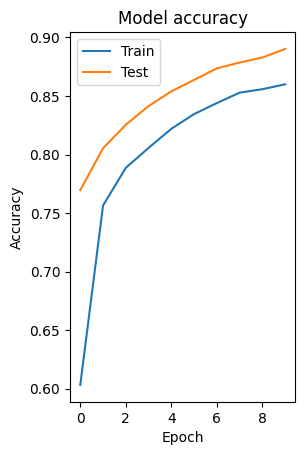

In [15]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

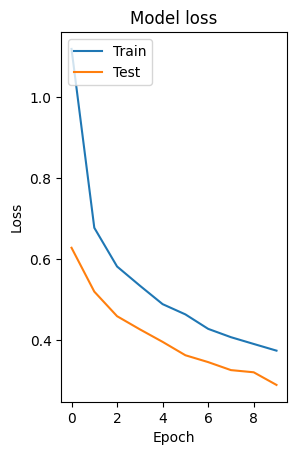

In [16]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')


In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>